In [28]:
import findspark
findspark.init()
findspark.find()

'C:\\spark-3.3.0-bin-hadoop3'

In [29]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[4]")\
       .appName("test").getOrCreate()

In [30]:
train=spark.read.csv('cell2celltrain.csv',header=True,sep= ",",inferSchema=True)
test=spark.read.csv('cell2cellholdout.csv',header=True,sep= ",",inferSchema=True)


### Showing 10 rows of the data

In [31]:
train.limit(10).toPandas()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24,219,22,0.25,0,0,-157,-19,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10,17,0,0,0,-4,0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38,8,38,0,0,0,-2,0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312,75,1.24,0,0,157,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0,17,0,0,0,0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.05,682,52,0.25,0,0,148,-3.1,...,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.66,26,30,0.25,0,0,60,4,...,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.13,98,66,2.48,0,0,24,6.8,...,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.3,24,35,0,0,0,20,-0.3,...,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,No,81,1056,75,0,0,0,43,2.4,...,0,5,No,1,30,No,3-Good,Other,Professional,No


In [32]:
#Churn : Yes:1 , No:0
  
from pyspark.sql.functions import when
train = train.withColumn("Churn",when(train["Churn"]=='Yes',1).otherwise(0))

In [33]:
train.limit(10).toPandas()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24,219,22,0.25,0,0,-157,-19,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.99,10,17,0,0,0,-4,0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38,8,38,0,0,0,-2,0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.28,1312,75,1.24,0,0,157,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.14,0,17,0,0,0,0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,0,38.05,682,52,0.25,0,0,148,-3.1,...,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,0,31.66,26,30,0.25,0,0,60,4,...,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,0,62.13,98,66,2.48,0,0,24,6.8,...,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,0,35.3,24,35,0,0,0,20,-0.3,...,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,0,81,1056,75,0,0,0,43,2.4,...,0,5,No,1,30,No,3-Good,Other,Professional,No


### checking null values in the dataset

In [34]:
from pyspark.sql.functions import col,isnan, when, count
null_values =  train.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in train.columns]
   )

null_values.limit(10).toPandas()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
pandas_train = train.toPandas()
pandas_test = test.toPandas()

### converting string columns to integers to use in the machine learning model using label encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [37]:
pandas_train = FunLabelEncoder(pandas_train)

pandas_test = FunLabelEncoder(pandas_test)

In [38]:
pandas_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,5028,1258,113,1,0,0,258,443,...,0,4,0,0,8,1,0,2,4,0
1,3000010,1,3378,2,82,0,0,0,591,1393,...,0,5,0,0,8,0,3,2,4,2
2,3000014,0,6656,2497,145,0,0,0,339,1393,...,0,6,0,0,15,0,2,3,1,2
3,3000022,0,11114,350,187,7,0,0,1392,2704,...,0,6,0,0,0,0,3,0,3,0
4,3000026,1,3649,0,82,0,0,0,1181,1,...,0,9,0,1,0,0,0,0,4,2


In [39]:
pandas_test.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,0,5561,1641,113,1,169,0,1410,1770,...,0,5,0,1,3,0,4,0,3,0
1,3000018,0,5374,1739,152,0,0,0,1256,1037,...,0,6,0,2,14,0,0,0,4,0
2,3000034,0,8274,46,128,85,364,0,1049,1438,...,0,4,0,3,0,0,2,2,1,2
3,3000070,0,3556,562,101,0,90,0,1168,1938,...,0,4,0,1,5,0,0,0,3,0
4,3000074,0,5378,236,128,5,0,13,1012,1047,...,0,3,0,0,0,0,0,2,3,0


In [40]:
pandas_test = pandas_test.dropna(how='any')

In [41]:
print(pandas_test.shape)


(20000, 58)


In [42]:
print(pandas_train.shape)


(51047, 58)


In [43]:
train = spark.createDataFrame(pandas_train)
test = spark.createDataFrame(pandas_test)

## Exploratory Data Analysis

In [44]:
train.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    0|36336|
|    1|14711|
+-----+-----+



In [45]:
train.columns

['CustomerID',
 'Churn',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRat

### Another interesting thing to do is to look at how certain features vary between the two groups (clients that left and the ones that did not). Here is one interesting result I found.

In [19]:
from pyspark.sql.functions import avg

train.select("ReceivedCalls","Churn").groupBy("Churn").agg(avg("ReceivedCalls")).show()

+-----+------------------+
|Churn|avg(ReceivedCalls)|
+-----+------------------+
|    0|118.76755834434155|
|    1|105.00059819182917|
+-----+------------------+



In [20]:

train.select("RespondsToMailOffers","Churn").groupBy("Churn").agg(avg("RespondsToMailOffers")).show()

+-----+-------------------------+
|Churn|avg(RespondsToMailOffers)|
+-----+-------------------------+
|    0|       0.3836966094231616|
|    1|       0.3591870029229828|
+-----+-------------------------+



In [21]:

train.select("CustomerCareCalls","Churn").groupBy("Churn").agg(avg("CustomerCareCalls")).show()

+-----+----------------------+
|Churn|avg(CustomerCareCalls)|
+-----+----------------------+
|    0|    1.9841424482606722|
|    1|    1.5845965603969854|
+-----+----------------------+



In [22]:
train.select("TotalRecurringCharge","Churn").groupBy("Churn").agg(avg("TotalRecurringCharge")).show()

+-----+-------------------------+
|Churn|avg(TotalRecurringCharge)|
+-----+-------------------------+
|    0|        142.8877697049758|
|    1|       138.89980286860174|
+-----+-------------------------+



### as we see there is always a relationship between churn customers and the variable we tested 

## correlation between churn and the others variables

##### commented because take long time to run

In [102]:
# from pyspark.ml.stat import Correlation
# x=train.columns[1:2]
# y=train.columns[1:]
# corr_plot = pd.DataFrame()
# for i in x:
#     corr=[]
#     for j in y:
#         corr.append(round(train.stat.corr(i,j),2))
#     corr_plot = pd.concat([corr_plot,pd.Series(corr)],axis=1)
# corr_plot.columns=x
# corr_plot.insert(0,'',y)
# corr_plot.set_index('')

,Churn
,
Churn,1.00
MonthlyRevenue,-0.02
MonthlyMinutes,-0.02
TotalRecurringCharge,-0.04
DirectorAssistedCalls,-0.01
OverageMinutes,0.01
RoamingCalls,0.02
PercChangeMinutes,-0.03
PercChangeRevenues,0.02


In [46]:
from pyspark.ml.feature import VectorAssembler
ignore=['Churn', 'CustomerID','TruckOwner','RVOwner','OwnsMotorcycle','PrizmCode','Occupation','OptOutMailings','OwnsComputer',
 'NonUSTravel','ChildrenInHH','ServiceArea']
vectorAssembler = VectorAssembler(inputCols=[x for x in train.columns  
                  if x not in ignore], outputCol = 'features')
new_train = vectorAssembler.transform(train)
new_train = new_train.select(['features', 'Churn'])

In [47]:
vectorAssembler = VectorAssembler(inputCols=[x for x in test.columns  
                  if x not in ignore], outputCol = 'features')
new_test = vectorAssembler.transform(test)
new_test = new_train.select(['features', 'Churn'])

In [48]:
from pyspark.ml.classification import RandomForestClassifier


rf = RandomForestClassifier(featuresCol = 'features', labelCol = 
                            'Churn',maxDepth=15)
rf_model = rf.fit(new_train)

In [49]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = rf_model.transform(new_test)
auc = BinaryClassificationEvaluator().setLabelCol('Churn')
print('AUC of the model:' + str(auc.evaluate(predictions)))

AUC of the model:0.9564825849455117


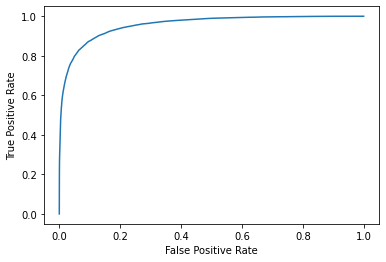

0.9564841638764489

In [50]:
import matplotlib.pyplot as plt
plt.plot(rf_model.summary.roc.select('FPR').collect(),
         rf_model.summary.roc.select('TPR').collect())
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
rf_model.summary.areaUnderROC